# STEP 02: Data exploration, Version 001

In this notebook, the data exploration is covered. There are three data sources that are being explored:

1. Weather: Information on temperature, cloud coverage, precipitation, etc at the location using the DarkSkyAPI
2. Sun position: Information on the position of the sun in the sky at the location using pysolar.solar
3. Solar panel production: Information on the amount of energy produced by the solar panels at the location

In [1]:
import datetime
import pandas as pd
import requests
import re
import json
import os
import plotly
plotly.offline.init_notebook_mode(connected=True)


from dateutil import tz
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Weather Data

Let's make a few plots to check some interesting values.

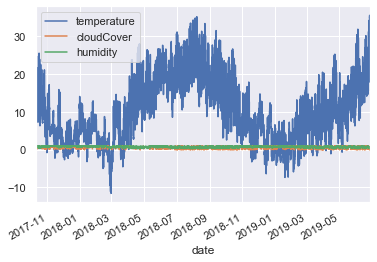

In [131]:
df_to_plot = df_cleaned[['temperature','cloudCover','humidity']]

df_to_plot.plot()
plt.show()

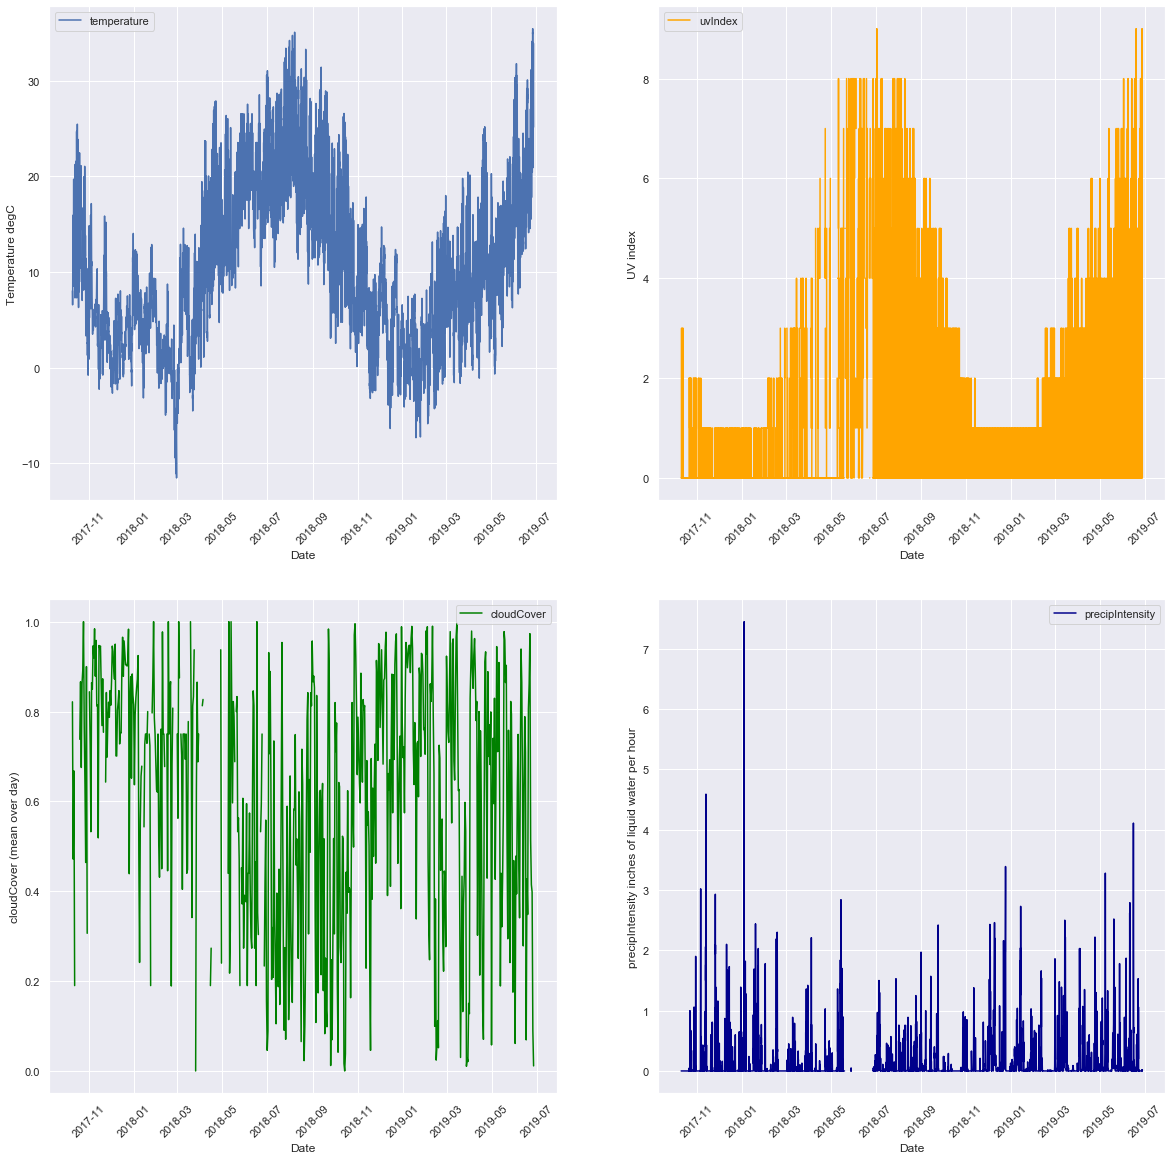

In [186]:
fig, axs = plt.subplots(2, 2, figsize=(20,20))
axs[0, 0].plot(df_cleaned['temperature'], label='temperature')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Temperature degC')
plt.sca(axs[0, 0])
plt.xticks(rotation=45)
plt.legend()

axs[0, 1].plot(df_cleaned['uvIndex'], label='uvIndex', color='orange')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('UV index')
plt.sca(axs[0, 1])
plt.xticks(rotation=45)
plt.legend()

# plot only the mean cloudcover for each day
cC_by_day = df_cleaned['cloudCover'].groupby(df_cleaned.index.date).mean()
axs[1, 0].plot(cC_by_day, label='cloudCover', color='green')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('cloudCover (mean over day)')
plt.sca(axs[1, 0])
plt.xticks(rotation=45)
plt.legend()

axs[1, 1].plot(df_cleaned['precipIntensity'], label='precipIntensity', c='darkblue')
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('precipIntensity inches of liquid water per hour')
plt.sca(axs[1, 1])
plt.xticks(rotation=45)
plt.legend()

plt.show()

We see that there is quite some missing data is present. Also, the temperature is following the distribution as expected with high temperatures in the summer and lower ones during the winter. Relevant in terms of forecasting the production of solar energy, the temperature along with the cloud cover, precipitation (if any) 